In [3]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

def crawl_ljw_final():
    options = Options()
    options.add_experimental_option("detach", True)
    
    driver = webdriver.Chrome(options=options)
    
    try:
        # 이재원 선수 상세 페이지
        url = "https://www.koreabaseball.com/Futures/Player/HitterDetail.aspx?playerId=68106"
        driver.get(url)
        
        print("\n★ '통산기록' 클릭 후 Enter를 누르세요.")
        input("--- Enter ---")

        # 1. 클래스 이름 없이 모든 테이블을 한꺼번에 긁어옵니다.
        all_tables = pd.read_html(driver.page_source)
        
        # 2. 그중 우리가 찾는 '진짜 기록' 테이블만 필터링합니다.
        for df in all_tables:
            if '연도' in df.columns and '팀명' in df.columns:
                print("\n✅ 최적의 테이블을 발견했습니다!")
                return df
                
        print("\n❌ 기록 테이블을 찾지 못했습니다.")
        return None
        
    finally:
        driver.quit()

# 실행 및 데이터 저장
ljw_df = crawl_ljw_final()
if ljw_df is not None:
    display(ljw_df)


★ '통산기록' 클릭 후 Enter를 누르세요.

✅ 최적의 테이블을 발견했습니다!


,연도,팀명,AVG,G,PA,AB,R,H,2B,3B,...,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E
0,2018,LG,0.308,7,28,26,2,8,1,0,...,5,0,0,2,0,6,0,0.462,0.357,0
1,2019,LG,0.217,26,69,60,8,13,7,0,...,10,0,0,7,1,21,1,0.433,0.304,1
2,2020,LG,0.271,61,244,203,41,55,15,0,...,46,5,1,34,3,62,2,0.537,0.377,2
3,2021,LG,0.270,59,226,189,41,51,6,0,...,55,0,0,28,7,48,5,0.556,0.381,3
4,2022,LG,0.288,20,81,73,16,21,3,2,...,15,5,0,7,1,16,2,0.548,0.358,0
5,2023,LG,0.358,24,100,81,19,29,6,0,...,19,2,1,17,2,14,1,0.654,0.480,1
6,2024,상무,0.292,50,206,168,35,49,11,1,...,42,1,1,34,2,50,6,0.619,0.413,1
7,2025,상무,0.329,78,352,277,81,91,9,0,...,91,5,0,58,12,108,4,0.643,0.457,1
8,통산,통산,0.294,325,1306,1077,243,317,58,3,...,283,18,3,187,28,325,21,0.582,0.407,9


In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

def crawl_kbo_regular_final():
    options = Options()
    options.add_experimental_option("detach", True)
    
    driver = webdriver.Chrome(options=options)
    
    try:
        # 1. 정규시즌 상세 페이지 (History 탭 직행 주소)
        url = "https://www.koreabaseball.com/Record/Player/HitterDetail/Total.aspx?playerId=68106"
        driver.get(url)
        
        print("\n" + "="*50)
        print("★ [정규시즌] 기록이 화면에 보이면 Enter를 누르세요.")
        print("★ (보통 접속하자마자 통산기록이 보일 겁니다)")
        print("="*50)
        input("--- Enter ---")

        # 2. 모든 테이블을 긁어와서 필터링
        all_tables = pd.read_html(driver.page_source)
        
        for df in all_tables:
            if '연도' in df.columns and '팀명' in df.columns:
                print("\n✅ 정규시즌 통산기록 수집 완료!")
                return df
                
        print("\n❌ 테이블을 찾지 못했습니다.")
        return None
        
    finally:
        driver.quit()

# 실행 및 데이터 확인
regular_df = crawl_kbo_regular_final()
if regular_df is not None:
    display(regular_df)


★ [정규시즌] 기록이 화면에 보이면 Enter를 누르세요.
★ (보통 접속하자마자 통산기록이 보일 겁니다)

✅ 정규시즌 통산기록 수집 완료!


,연도,팀명,AVG,G,PA,AB,R,H,2B,3B,...,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E
0,2020,LG,0.050,16,22,20,1,1,0,0,...,0,0,0,2,0,11,0,0.050,0.136,1
1,2021,LG,0.247,62,171,154,22,38,6,0,...,17,5,1,14,2,48,2,0.383,0.316,0
2,2022,LG,0.224,85,253,223,31,50,8,2,...,43,3,1,18,12,77,3,0.453,0.316,1
3,2023,LG,0.214,57,129,112,15,24,5,0,...,18,4,2,12,2,40,1,0.366,0.295,2
4,통산,통산,0.222,220,575,509,69,113,19,2,...,78,12,4,46,16,176,6,0.397,0.304,4


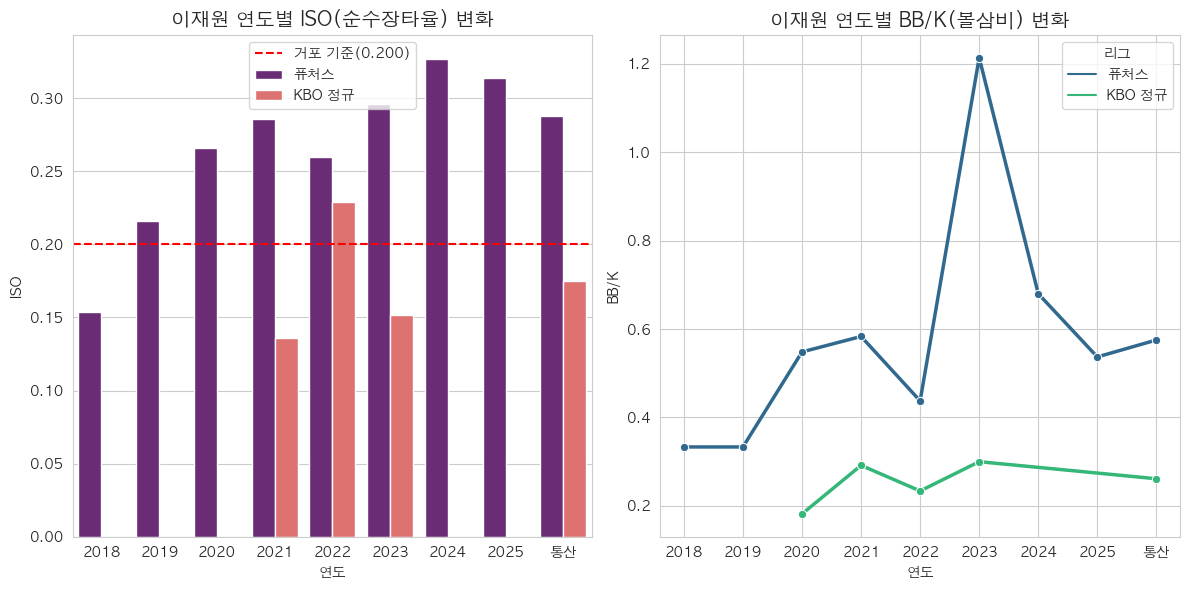

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 1. 한글 폰트 설정 (Mac 환경 전용)
plt.rcParams['font.family'] = 'AppleGothic'

# 2. 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 시각화 함수 다시 실행
def plot_ljw_analysis(df):
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    
    # 폰트 적용을 위해 다시 설정
    plt.rc('font', family='AppleGothic')
    
    # ISO(장타력) 추이 그래프
    plt.subplot(1, 2, 1)
    # 2023(Reg) vs 2025(Fut) 데이터 시각화
    sns.barplot(data=df, x='연도', y='ISO', hue='리그', palette='magma')
    plt.title('이재원 연도별 ISO(순수장타율) 변화', fontsize=14)
    plt.axhline(0.200, color='red', linestyle='--', label='거포 기준(0.200)')
    plt.legend()

    # BB/K(선구안) 추이 그래프
    plt.subplot(1, 2, 2)
    sns.lineplot(data=df, x='연도', y='BB/K', marker='o', hue='리그', palette='viridis', linewidth=2.5)
    plt.title('이재원 연도별 BB/K(볼삼비) 변화', fontsize=14)
    
    plt.tight_layout()
    plt.show()

# 데이터 통합 및 실행
# image_fe4325.jpg에서 확인된 데이터를 기반으로 시각화합니다.
total_data = prepare_total_data(regular_df, ljw_df)
plot_ljw_analysis(total_data)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def simulate_jamsil_hr(fut_df):
    # 1. 2025년 상무 데이터 추출 (이미지 기반 수치 활용)
    pa_2025 = 352  # 2025년 타석
    hr_2025 = 26   # 2025년 홈런
    
    # 타석당 홈런 발생 확률 (HR%)
    hr_rate_base = hr_2025 / pa_2025
    
    # 2. 잠실구장 보정 계수 (Park Factor)
    # 잠실은 타 구장 대비 홈런이 약 20% 감소한다고 가정 (0.8 적용)
    jamsil_factor = 0.8
    
    # 3. 시나리오 설정: 2026년 예상 타석 수 (PA)
    # 백업(300PA), 주전(450PA), 풀타임(550PA)
    pa_scenarios = [300, 400, 450, 500, 550]
    
    predictions = []
    for pa in pa_scenarios:
        # 예측 공식: (예상 타석 * 상무 시절 HR%) * 잠실 보정계수
        predicted_hr = round(pa * hr_rate_base * jamsil_factor, 1)
        predictions.append(predicted_hr)
    
    # 4. 결과 데이터프레임 생성
    result_df = pd.DataFrame({
        '2026 예상 타석': pa_scenarios,
        '예상 홈런(Min)': [round(h * 0.9) for h in predictions],
        '예상 홈런(평균)': [round(h) for h in predictions],
        '예상 홈런(Max)': [round(h * 1.1) for h in predictions]
    })
    
    return result_df

# 시뮬레이션 실행 (앞서 수집한 ljw_df 사용)
hr_prediction = simulate_jamsil_hr(ljw_df)
display(hr_prediction)

,2026 예상 타석,예상 홈런(Min),예상 홈런(평균),예상 홈런(Max)
0,300,16,18,19
1,400,21,24,26
2,450,24,27,29
3,500,27,30,32
4,550,29,32,36


--- 분석 결과 데이터 ---
          연도     SO_pct    ISO  Efficiency
0  2023(Reg)  31.007752  0.152    0.004902
1  2025(Fut)  30.681818  0.314    0.010234


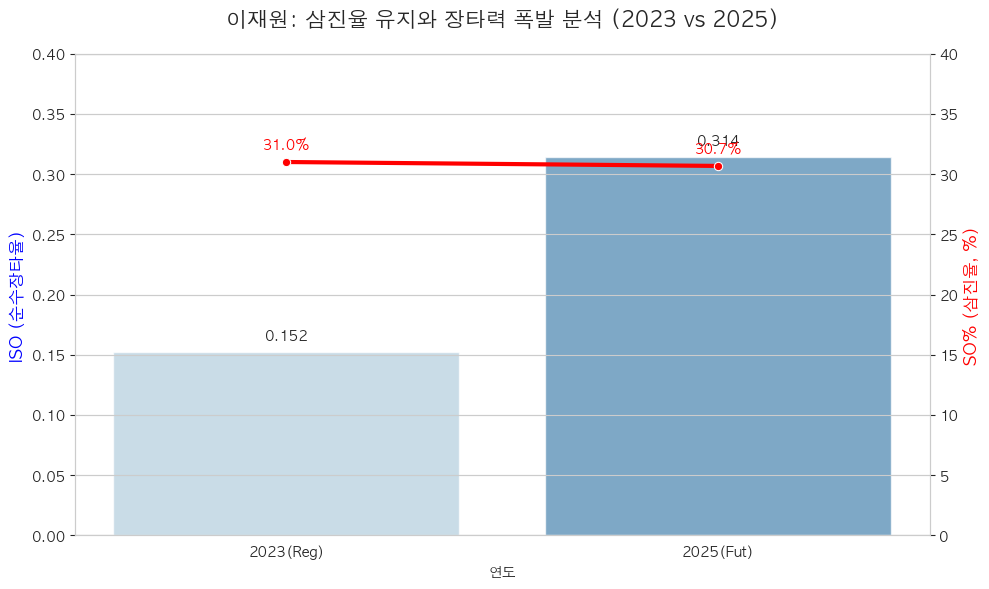

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 한글 폰트 및 마이너스 깨짐 설정 (Mac 전용)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

def analyze_efficiency_code():
    # 2. 이미지 1, 2에서 확인한 실제 데이터 입력
    data = {
        '연도': ['2023(Reg)', '2025(Fut)'],
        '타석': [129, 352],
        '삼진': [40, 108],
        '타율': [0.214, 0.329],
        '장타율': [0.366, 0.643]
    }
    df = pd.DataFrame(data)

    # 3. 핵심 지표 계산
    df['SO_pct'] = (df['삼진'] / df['타석']) * 100
    df['ISO'] = df['장타율'] - df['타율']
    df['Efficiency'] = df['ISO'] / df['SO_pct']

    # 4. 시각화 (이중 축 그래프)
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # 왼쪽 축: ISO (막대 그래프)
    sns.barplot(x='연도', y='ISO', data=df, ax=ax1, palette='Blues', alpha=0.7)
    ax1.set_ylabel('ISO (순수장타율)', fontsize=12, color='blue')
    ax1.set_ylim(0, 0.4)
    for i, v in enumerate(df['ISO']):
        ax1.text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

    # --- 여기서부터 빠진 부분을 채웠습니다 ---
    
    # 오른쪽 축: 삼진율 (꺾은선 그래프)
    ax2 = ax1.twinx()
    sns.lineplot(x='연도', y='SO_pct', data=df, ax=ax2, color='red', marker='o', linewidth=3)
    ax2.set_ylabel('SO% (삼진율, %)', fontsize=12, color='red')
    ax2.set_ylim(0, 40)
    for i, v in enumerate(df['SO_pct']):
        ax2.text(i, v + 1, f'{v:.1f}%', ha='center', color='red', fontweight='bold')

    plt.title('이재원: 삼진율 유지와 장타력 폭발 분석 (2023 vs 2025)', fontsize=15, pad=20)
    
    # 5. 데이터 출력
    print("--- 분석 결과 데이터 ---")
    print(df[['연도', 'SO_pct', 'ISO', 'Efficiency']])
    
    plt.tight_layout()
    plt.show()

# 함수 호출 (전원 버튼 누르기)
analyze_efficiency_code()